# Programming Project November 2019


## by Claire Nolan (Student Number G00376464)




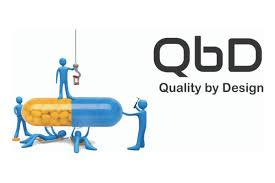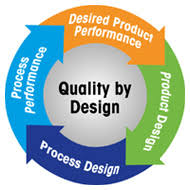

# 1. Introduction

The aim of the Programming for data analytics project for 2019 is to:
1. create a dataset by simulating a real-world phenomenon which
   - must be able to be measured
   - have collected >100 data points over 4 variables
   - investigate type of variables, distributions, relationships with each other
2. Model and synthesise data using the Python numpy.random package
   - synthesise/simulate dataset matching their properties as possible
3. Detail research and implement the simulation in this notebook

For this project I will use my experience in the pharmaceutical industry to investigate a real-life dataset for the distribution types and relationships between the variables. I will then use this knowledge to simulate a data with five variables with specific specification ranges, distributions and shapes. This data will be outputted as a dataframe which can create plots.

A number of Python libraries will be used in htis project and a brief description is discussed below:

### Pandas
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

### Numpy
Numpy creates random data. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

### Seaborn
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

### Matplotlib
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.


## References:

All references studied as part of this project are shown below and ones where code was sepcifically used are also specified within the report.

1. https://www.fda.gov/media/71021/download - FDA guidelines for process validation
2. https://www.ich.org/page/quality-guidelines - ICH quality guidelines
3. https://www.pharmaceuticalonline.com/doc/design-space-development-how-and-when-to-get-started-0001 - a paper on the theory of design space.
4. https://en.wikipedia.org/wiki/Quality_by_Design - overview of QBD
5. https://en.wikipedia.org/wiki/Cream_(pharmaceutical) - Brief introduction to creams
6. https://wiki.anton-paar.com/en/consistency-measurement/ - explanation of the consistency measurement
7. https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459 - explanation of Poisson distribution and code to create Poisson distributed dataset.
8. https://datatofish.com/read_excel/ Used code to import data from an excel file
9. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
10. https://www.sharpsightlabs.com/blog/numpy-random-normal/
11. https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/
12. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson
13. https://en.wikipedia.org/wiki/Poisson_distribution
14. http://mathworld.wolfram.com/PoissonDistribution.html
15. https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
16. https://www.mssqltips.com/sqlservertip/6120/data-exploration-with-python-and-sql-server-using-jupyter-notebooks/
17. https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
18. https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/



# 2. Creating a dataset by simulating a real world phenomenon

I work within the pharamceutical industry which is a heavily regulated industry. One of the key regulatory agencies is the US FDA regulatory agency. The Food and Drug Administration (FDA or USFDA) is a federal agency of the United States Department of Health and Human Services, one of the United States federal executive departments. The FDA is responsible for protecting and promoting public health through the control and supervision of food safety, tobacco products, dietary supplements, prescription and over-the-counter pharmaceutical drugs (medications), vaccines, biopharmaceuticals, blood transfusions, medical devices, electromagnetic radiation emitting devices (ERED), cosmetics, animal foods & feed and veterinary products (Ref. 1).

Another key group is the International Council for Harmonisation of Technical Requirements for Pharmaceuticals for Human Use (ICH). This is an initiative that brings together regulatory authorities and pharmaceutical industry to discuss scientific and technical aspects of pharmaceutical product development and registration. The mission of the ICH is to promote public health by achieving greater harmonisation through the development of technical Guidelines and requirements for pharmaceutical product registration (Ref. 2).

Since 2011 the FDA have requested that any new drugs to be manufactured must have all manufacturing inputs be fully understood to ensure good quality product is manufactured. These also align with the ICH guidelines Q7,8,9 and the guidelines by the Eurpoean medicines agency (EMA). These manufacturing inputs include raw materials, temperature, manufacturing conditions, time, operating parameters etc. The is known as the design space or quality by design (QBD). The theory is if the inputs are managed and controlled within the design space then the product is of good quality. Quality is usually defined as a number of outputs which must meet certain specifications (Ref. 3 and 4).

For this project the inputs for one particular product which I currently work with will be simulated. This particular product has five key inputs which if they all remain within the design space then the consistency result will meet the registered specifications resulting in good quality product.

The dataset that I will be simulating is based on a dataset I am currently working on in my job. There is an issue with a the consistency result of a cream product which is outside the specification (Ref. 5 and 6). 

Creams are semi-solid emulsions of oil and water. They are semisolid dosage forms containing more than 20% water or volatile components and typically less than 50% hydrocarbons, waxes, or polyols as vehicles for one or more drug substances dissolved or dispersed in a suitable cream base. Consistency describes the degree to which a semi-fluid or semi-solid material resists deformation by an applied force ie how the cream performs when it is applied to the skin.

For this particular cream product there are  a number of variables which have an impact on the consistency results. These are the pH of the cream, excipient A assay, excipient B viscosity, excipient C LOD and how many times the pH had to be adjusted per batch to meet the pH specification.

Note: Excipient is a raw material used to manufacture the cream. Assay is the amount of the excipient in the cream. LOD is loss of drying ie how dry is excipient. Viscosity is how thick is the excipient.

The required specifications for each input are shown below:
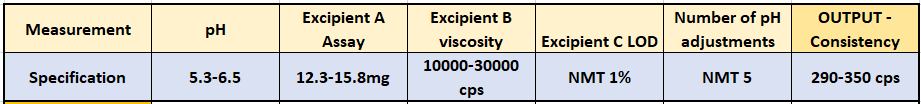

As per the theory of Quality by Design if the batch is manufactured within the design space specifiations for these parameters then the consistency result should then always within specification. 



## 2.1 Importing the real world data
The real-world data that i have will be imported into the notebook to allow for investigation

In [12]:
# The code below imports the excel file where the real world data can be invesigated  

# Code used from ref 8 - https://datatofish.com/read_excel/ 

import pandas as pd

real = pd.read_excel (r"C:\Users\Claire Laptop\Desktop\ProgrammingProjectNOV2019\Real-World-Data-for-Programming-Project-Nov2019.xlsx") 
# the "r" is used before the path string to address special character, such as '\')

real

,Batch ID,pH,Excipient-A-Assay,Excipient-B-viscosity,Excipient-C-LOD,Number-of-pH-adjustments,OUTPUT-Consistency
0,Batch 0001,6.1,14.621829,16249.0,0.105939,0.0,320
1,Batch 0002,6.0,14.481876,16141.0,0.105939,1.0,315
2,Batch 0003,5.9,14.478668,15672.5,0.105182,2.0,315
3,Batch 0004,6.0,14.297281,16268.0,0.104425,0.0,310
4,Batch 0005,6.0,14.169845,15457.5,0.102155,0.0,315
5,Batch 0006,5.9,13.998493,15848.5,0.102155,0.0,320
6,Batch 0007,5.9,14.077660,15215.5,0.102155,1.0,315
7,Batch 0008,5.9,13.985144,16077.5,0.103669,4.0,310
8,Batch 0009,5.8,14.092292,16120.0,0.104425,1.0,310
9,Batch 0010,6.0,14.483974,16339.0,0.104425,1.0,320


## 2.2 Investigate the descriptive statistics for the real dataset

The descriptive stats will be used to determine the mean and standard deviation of the current data. These values will be important when simulating data later on. 

In [13]:
# code to calculate and display the descritpive statistics of the data

real.describe() 


,pH,Excipient-A-Assay,Excipient-B-viscosity,Excipient-C-LOD,Number-of-pH-adjustments,OUTPUT-Consistency
count,250.000000,250.000000,250.000000,250.000000,249.000000,250.000000
mean,5.801600,14.388539,16123.680000,0.105406,0.935743,313.324000
std,0.157022,0.580054,665.727737,0.003971,0.917948,9.692616
min,5.400000,12.607502,14626.000000,0.095345,0.000000,293.000000
25%,5.700000,13.999002,15676.500000,0.103101,0.000000,307.000000
50%,5.800000,14.383466,16074.000000,0.105182,1.000000,311.000000
75%,5.900000,14.746871,16493.500000,0.107452,1.000000,320.000000
max,6.400000,15.692054,17915.000000,0.118046,4.000000,335.000000


## 2.3 Investigate the distributions of the real dataset variables

Using the Seaborn program to visualise the data to determine the distribution of the data, eg uniform, normal, Poisson etc.

Pairplots will be created for the variables. 

Histograms for each variable will be used to determine the distribution of the data. The data distribution is important as it will determine what code will be used to create the simulated data.

The scatterplots will show the relationships between the variables. These relationships will be important when creating teh simulated datasets.

C:\Users\Claire Laptop\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Claire Laptop\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


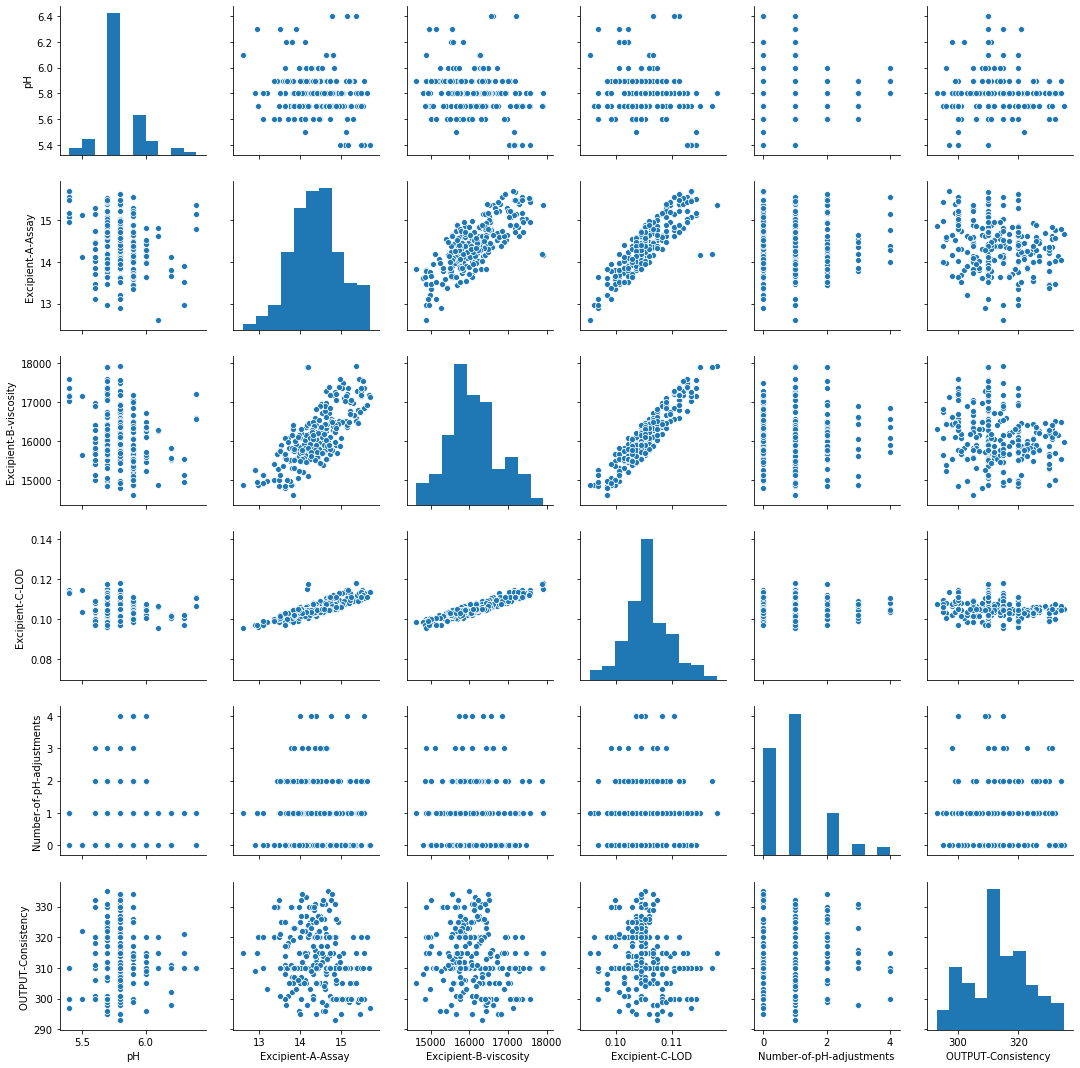

In [14]:
# This code is used to import the Seaborn program to allow histograms and scatterplots of the variables to be created.

import seaborn as sns #import seaborn as sns.

sns.pairplot(real) 

C:\Users\Claire Laptop\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Claire Laptop\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


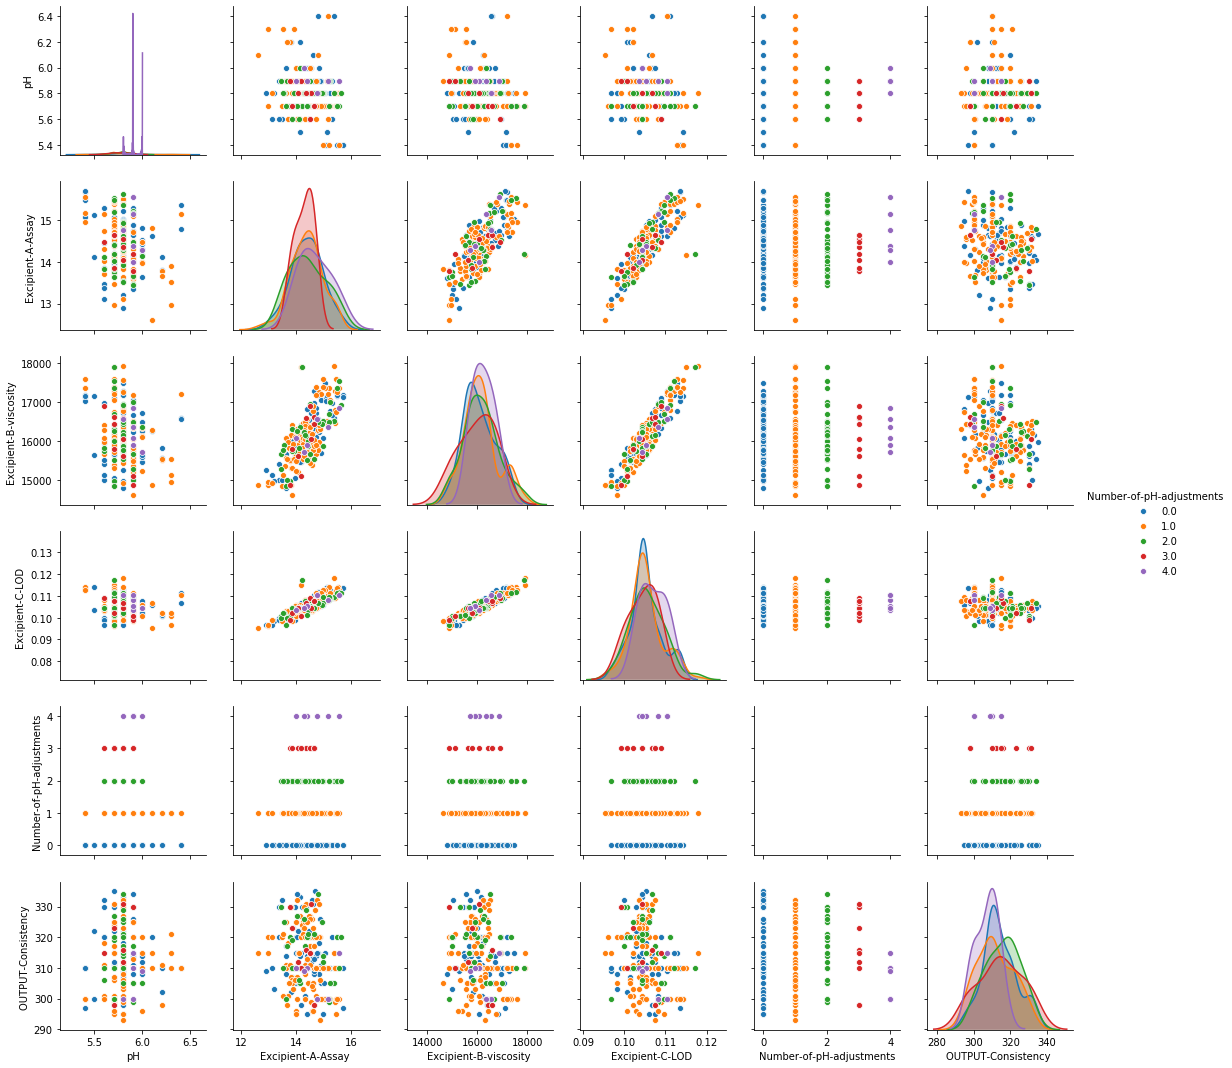

In [15]:
# This code is used to determine the impact of the number of pH adjustments per batch on the output.

sns.pairplot(real, hue="Number-of-pH-adjustments")

## 2.4 Results of the analysis of the real-world dataset

The real-world dataset has 5 variables - pH, excipient A assay, excipient B viscosity, excipient C LOD, number of pH adjustments per batch. The mean (average) value and standard deviation for each variable was calcualted. Each variable has a perticular specification. This data is shown below:
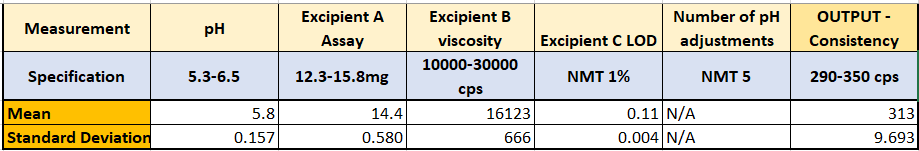

The histograms for each of the variables show the that the data is normally distributed except for the number of pH adjustmens. The number of pH adjustments is most probably Poisson distributed as it is the probabily of a number of events occurring for a particular batch

The scatter plots show a linear realationship between LOD, viscosity and assay. There is little to no relationship with pH and number of pH adjustments.

# 3. The dataset

The dataset that I will be simulating is based on the real-life dataset I am currently working on in my job. There is an issue with a the consistency result of a cream product which is outside the specification. 

For this particular cream product there are  a number of variables which have an impact on the consistency results. These are the pH of the cream, excipient A assay, excipient B viscosity, excipient C LOD and how many times the pH had to be adjusted per batch to meet specification.

As part of the design space if the batch is manufactured within these specifiations for these parameters then the consistency result should also be in specification. 

Based on the historical data from the real-world dataset, i know that there are 5 variables - pH, excipient A assay, excipient B viscosity, excipient C LOD, number of pH adjustments per batch. The mean (average) value and standard deviation for each variable was calcualted. Each variable has a particular specification. This data is shown below:
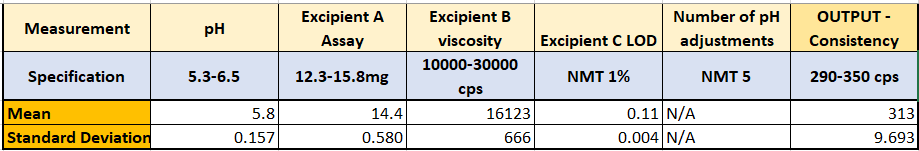

The histograms for each of the variables show the that the data is normally distributed except for the number of pH adjustmens. The number of pH adjustments is most probably Poisson distributed as it is the probabily of a number of events occurring for a particular batch

The scatter plots show a linear realationship between LOD, viscosity and assay. There is little to no relationship with pH and number of pH adjustments.

Based on this information I will create the simulated dataset by firstly importing the various Pythpn libraries requird to create the simulated data. Then I will use the the historical information to first create variables for the dataset with various characterisitics based on the historical mean and standard deviation, distribution and specification range. I will then combine these variables into one dataset which I will then use to display descriptive statisics and display as histograms and scatterplots. 

## 3.1. Import various Python libraries into this Jupyter notebook¶

For this project I will import a number of the key libraries in Python for data analysis. These are described below:
#### Numpy
For creating random data Numpy is the most imortant library. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. It is really efficient and quick at dealing with lists and data arrays containg large amounts of numbers and working on lists within lists in multidimensional arrays. The beauty of Numpy is that it can perform operations within these arrays.
#### Pandas
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.
#### Seaborn
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.
#### Matplotlib
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

In [16]:
import numpy as np #this tells the program to generate random numbers from the numpy program

In [17]:
import matplotlib.pyplot as plt #matplot is the subprogram of python for generating plots

In [18]:
import pandas as pd #Imports the Pandas program

In [19]:
import seaborn as sns #import seaborn as sns

## 3.2 Creating a random dataset

The next steps is to create datasets for each variable within the desired specifications which are normally distributed or Poisson distributed. I am choosing to have 150 data points as this represents approximately six years of batch data as approximately 25 batches are manufactured per year.

Most of the inputs must be within certain specification ranges with even more specific limits so the code for the dataset will need to be even more specific which are described below. The historical standard deviations and means for each variable (except pH adjustments) are shown below for reference as these values will be used to cread the simulated datasets. 

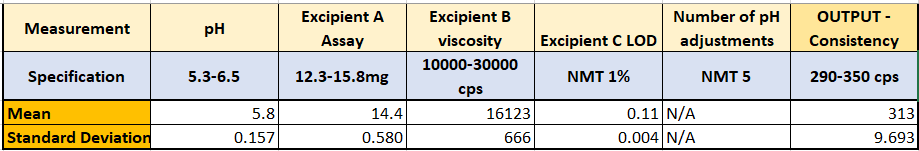

References 9 and 10 were extensively used to work on creating the data for the variables.


## 3.3 Creating a dataset for the pH input

As per above the specification range is between 5.3-6.5 and it is desirable to have the mean result in the middle of this range. The data is normally distributed.

In [20]:
# This code is used to create a list of 150 data points between 0 and 1 to represent

x = np.random.randint(100, size=150) #ie create a list of 150 integers between 0 to 100 but not including 100.

print(x) # this tells the program to show the array


[ 4  2 59  2 33 93 78 45  4 26 46 26 89  3 28 23 91 30 28 99 12 58 93 68
 10 35 85 46 63 28  9 60 45 88 75 57 77 96 74 85 69 84 15 27 74 76 29 98
 58 56 12  6 69 44 49 17 39 27 35 80 88 30 63 10 95 26 44 70 76 21 20 16
 92 95 90 17  1 37 49 21 31 26 38 84  9 57 34 57 24 95 13 15 74 82 65 98
 90 25 88 40 40 60 55 38 79  2  9 33 42 54 84 43 93  4 86 92 58 48 25  1
 32 62 76 76 91 66 72 49 41  2 27 97 40 85 82 99 28 12 72 71 97  8 38 63
 97  4 60 94 70 78]


The above array is just a basic dataset. I want to now create a more representative dataset which is normally distributed within the range 5.3 to 6.5. 

Below is the basic code to create normally distributed random data with a specified mean and standard deviation. This is the syntax for the code:
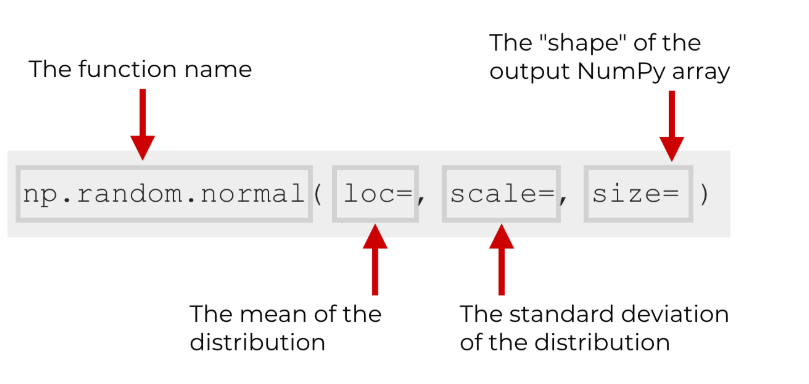
I know I want to create a dataset where the mean is in the middle of the specification range which is 5.8. I am also going to say the standard deviation is approximately 0.16 which is based on historical data.



In [21]:
# Create a list of 150 normally distributed numbers where mean is 5.8 and standard deviation is 0.16.

pH = np.random.normal(5.8, 0.16, 150) 

pH


array([6.03215298, 5.86753707, 5.61380665, 5.80757697, 5.80657258,
       5.46166574, 5.65107291, 5.77882599, 5.72971206, 5.68330855,
       5.90994155, 5.71124057, 5.71974868, 5.90484025, 5.58529474,
       5.90182445, 5.8849727 , 5.52866757, 5.92234956, 5.90299371,
       5.71477359, 5.94563566, 5.66203343, 5.854289  , 5.70365798,
       5.88936168, 5.67394008, 5.49517405, 5.62305168, 5.85421784,
       5.74178355, 5.87389044, 5.88541513, 5.72058289, 5.94925585,
       5.66938439, 5.47377088, 5.86596204, 5.91380151, 5.703647  ,
       5.78740513, 6.0113306 , 5.70633214, 5.70004816, 5.91155155,
       5.58239256, 5.78374544, 5.80726726, 5.69176545, 5.88352777,
       5.74211231, 5.98663479, 5.7834454 , 5.80376996, 5.6083126 ,
       6.0684705 , 5.88916089, 5.50857637, 5.97553484, 5.78628233,
       5.76513113, 6.07954239, 5.53614692, 5.89386179, 5.7082263 ,
       5.94451549, 5.71250725, 5.6924289 , 5.67022154, 5.71413222,
       5.86853043, 5.61471101, 6.07734515, 5.91551363, 5.56335

In [22]:
# this code is also similar to the code below where size is the number of required data points, loc is the mean and scale is the standard deviation

pH1 = np.random.normal(size = 150, loc = 5.8, scale = 0.16)

pH1

array([5.8683106 , 5.69731244, 5.68582659, 5.69442361, 5.67153535,
       5.87788351, 5.92983205, 5.71474155, 5.45509633, 5.79917845,
       5.85180461, 5.56754304, 5.88154141, 5.78984414, 5.87069591,
       5.89640116, 5.64724401, 5.81222251, 5.60998237, 5.89523595,
       5.67968735, 5.95250718, 5.86415669, 5.75505224, 5.84683162,
       6.21033996, 5.57445839, 5.91203635, 5.75309245, 5.64303008,
       5.7455112 , 5.812793  , 5.50051601, 5.53719315, 5.88313479,
       5.76351182, 5.54795232, 6.0748969 , 5.73459346, 5.92195035,
       5.97754765, 5.73767024, 5.57343209, 5.87452521, 5.88451828,
       5.78007357, 5.95974524, 5.50343043, 5.78227871, 5.49660437,
       5.57860028, 5.73046097, 5.88447565, 5.83631249, 5.61935969,
       5.69829391, 5.93269994, 5.97515907, 5.61701656, 5.80590087,
       5.63727928, 6.03172663, 5.6685097 , 5.61352088, 6.07533238,
       5.5730307 , 5.80987017, 5.98709039, 5.7937619 , 5.90164749,
       5.81841619, 5.71310811, 5.74959748, 5.86840588, 5.82395

(array([ 9., 10., 20., 29., 28., 22., 17.,  9.,  5.,  1.]),
 array([5.46166574, 5.5358495 , 5.61003326, 5.68421701, 5.75840077,
        5.83258452, 5.90676828, 5.98095204, 6.05513579, 6.12931955,
        6.2035033 ]),
 <a list of 10 Patch objects>)

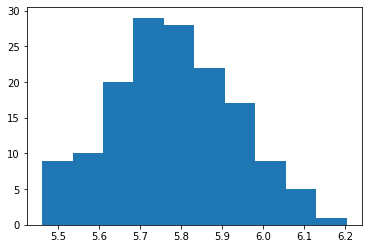

In [23]:
plt.hist(pH) # display results as a histogram plot



(array([ 4., 12., 20., 35., 30., 27., 13.,  5.,  3.,  1.]),
 array([5.40588611, 5.49968104, 5.59347597, 5.6872709 , 5.78106583,
        5.87486076, 5.96865569, 6.06245061, 6.15624554, 6.25004047,
        6.3438354 ]),
 <a list of 10 Patch objects>)

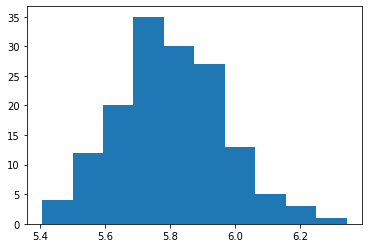

In [24]:
plt.hist(pH1) # display results as a histogram plot

From the data created using the historical mean and standard deviation and from the histogram, this code creates a good repesentation of the actual data.

The remaining datasets can now be created with the same code using the historical means and standard deviation values. I will use this code:

"variable" = np.random.normal("mean", "std dev", "number of data points")

## 3.4 Creating a dataset for the assay of excipient A input

[14.25226329 14.43412819 14.40916779 14.5978565  13.85424669 14.85587262
 15.47110835 14.29401029 14.70291721 14.37834758 14.63173377 13.28740859
 14.28568581 15.13907115 14.32211719 15.26384904 14.25982046 14.47850318
 13.64169136 14.1381814  14.57967373 14.32368216 13.91026147 14.15260616
 14.44628501 14.98302619 15.01149    14.65838607 14.07942653 15.4110676
 14.43933096 13.37582274 14.70974478 15.38394042 13.63979169 14.19828632
 14.1708744  14.4143608  15.06101635 14.08011337 13.67895183 14.4883518
 14.4297857  14.75540978 15.0242516  14.39590823 14.46574724 13.93401435
 13.71737006 14.32732794 15.01976982 14.08440484 14.18439647 15.63320476
 13.94164791 14.06922697 15.16235279 13.99240105 15.32443412 14.13771256
 13.5467036  14.3329232  14.20761993 14.10043145 13.54649598 14.69730531
 14.50318971 13.77942135 13.15365267 14.37158167 14.11012128 14.32073218
 14.13181678 14.61377913 14.33542872 14.74555433 14.57430765 14.41500797
 12.53125446 13.83207733 14.61873979 13.6347638  15.3

(array([ 2.,  1.,  4., 12., 31., 38., 25., 18., 13.,  6.]),
 array([12.53125446, 12.8566154 , 13.18197633, 13.50733727, 13.83269821,
        14.15805914, 14.48342008, 14.80878101, 15.13414195, 15.45950288,
        15.78486382]),
 <a list of 10 Patch objects>)

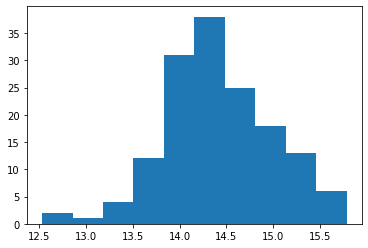

In [25]:
# Assay of excipient A - specification 12.3 - 15.8mg.

# Create a list of 150 normally distributed numbers where mean is 14.4 and standard deviation is 0.580.

assay = np.random.normal(14.4, 0.580, 150) 

print(assay)

plt.hist(assay) # display results as a histogram plot

### 3.5 Creating a dataset for the viscosity of excipient B input

[16157.78112067 16240.96663728 16436.70741152 15171.33580922
 15656.59339119 16401.92545634 15828.1036769  15330.87770346
 17169.76781921 16747.14462257 15318.96036794 15386.3647785
 16799.27215954 16607.34782404 16027.01900614 16131.54197681
 16689.80114962 16250.34873592 16224.65967822 16509.37806359
 16809.69503254 16361.32690622 15551.1172978  15629.78885027
 15254.98396482 15580.33633323 16456.28701793 16230.58956938
 16878.34105649 16406.42605305 16286.43180903 15630.31337566
 16731.71444679 16601.95817882 16532.25674242 16447.35951245
 15037.4005151  16740.02072313 15898.2660149  16067.11287302
 17767.43263414 16118.64173782 15669.33545074 16399.0492524
 15877.62502517 16690.08265992 16248.25291368 16706.11143716
 15971.74295386 16764.31915584 15593.72997841 16539.40305318
 15581.54842958 15901.85283879 16404.54109532 15997.36158944
 15968.82995261 16730.96565714 16953.13941938 16133.33022643
 16003.02039627 16138.1581193  16575.35618196 16833.51274492
 15147.47325713 16129.8512

(array([ 4., 16., 23., 17., 38., 30., 15.,  2.,  2.,  3.]),
 array([14823.77725448, 15144.43688574, 15465.096517  , 15785.75614827,
        16106.41577953, 16427.07541079, 16747.73504206, 17068.39467332,
        17389.05430458, 17709.71393585, 18030.37356711]),
 <a list of 10 Patch objects>)

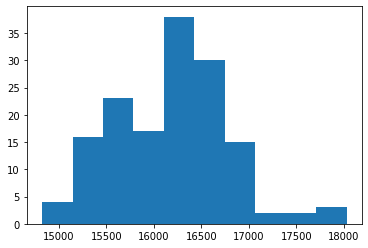

In [26]:
# Viscosity of excipient B - specification 10000 -300000.

# Create a list of 150 normally distributed numbers where mean is 16123 and standard deviation is 666.

visc = np.random.normal(16123, 666, 150) 

print(visc)

plt.hist(visc) # display results as a histogram plot

## 3.6 Creating a dataset for the LOD of excipient C input

LOD values skew towards 0.1% rather than middle of NMT 1% (mean 0.11% and std dev 0.004). There are circumstances where a particular batch of this excipient may have a higher than usual LOD value which is still within specification eg at 0.9%. I would like to create a dataset where most values are around the mean of 0.11% but with some atypical higher results within specification. From the website (reference 11) the following code is suggested to create long tails.

Long Tails are extreme values at the edge of the distribution and can occur in one or both directions. In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction. To create a data range and plot a tail with an additional 10 uniformly random values in the range 10-to-110 are added to the dataset. This creates a long tail on the distribution.

[0.11649738 0.10755297 0.10788731 0.10570813 0.11346163 0.10079385
 0.11697925 0.10695517 0.11127616 0.10900252 0.11584843 0.10175944
 0.10871033 0.10846378 0.11453508 0.10560043 0.10931029 0.10648857
 0.11016885 0.11233126 0.10559752 0.11457889 0.11360636 0.11200998
 0.11360342 0.10726509 0.10950844 0.10625692 0.10892845 0.11212142
 0.10723336 0.10841299 0.10725131 0.10661918 0.10731502 0.10994934
 0.10553076 0.11093766 0.11663921 0.11296818 0.10923266 0.10644948
 0.10701137 0.11676982 0.11020323 0.10745202 0.11076366 0.11840102
 0.11048064 0.11246881 0.11120068 0.108591   0.10542993 0.10860263
 0.10916442 0.11234649 0.11335593 0.11372441 0.11114235 0.11354056
 0.10698241 0.11501147 0.11205172 0.10880763 0.11195407 0.10969771
 0.11452652 0.11607927 0.1187423  0.10441401 0.10422354 0.10798214
 0.11064015 0.11350468 0.11126254 0.1019112  0.10877518 0.1133119
 0.11092038 0.11304804 0.10911069 0.10919697 0.11074625 0.11164021
 0.1107932  0.11047603 0.10731735 0.11151026 0.11048729 0.11451

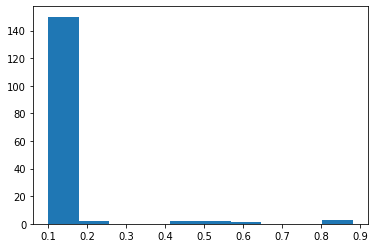

In [27]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)

# generate a univariate data sample

# LOD = std dev * randn(no of data points) + mean result
LOD = 0.004 * randn(150) + 0.11 

# tail = mean + (rand(no of extreme data points) * number to create a range)
tail = 0.11 + (rand(10) * 0.8) # ie create 10 values as a long tail from 0.105 to 0.905 (0.105+0.8). 0.8 was chosen so that tail values remained under the specification limit of NMT 1.0%.

# append the tail data to the regular data
LOD = append(LOD, tail)

print(LOD)

# display results as a histogram plot

pyplot.hist(LOD) 
pyplot.show()


## 3.7 Creating a dataset for the number of pH adjustments input

The number of pH adjustments per batch is Poisson distributed so the code used above is not suitable.

Poisson distribution is the limit of the binomial distribution for large N. The Poisson distribution, named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume. The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. See reference 12, 13 and 14.

For instance, an individual keeping track of the amount of mail they receive each day may notice that they receive an average number of 4 letters per day. If receiving any particular piece of mail does not affect the arrival times of future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another, then reasonable assumption is that the number of pieces of mail received in a day obeys a Poisson distribution. Other examples that may follow a Poisson distribution include the number of phone calls received by a call center per hour and the number of decay events per second from a radioactive source.

The equation is:$${\displaystyle P(k{\text{ events in interval}})={\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$$

where:

$${\lambda}$$
is the average number of events per interval

e is the number 2.71828... (Euler's number) the base of the natural logarithms

k takes values 0, 1, 2, ...

k! = k × (k − 1) × (k − 2) × ... × 2 × 1 is the factorial of k.

The Poisson distribution may be useful to model events such as

The number of meteorites greater than 1 meter diameter that strike Earth in a year
The number of patients arriving in an emergency room between 10 and 11 pm
The number of photons hitting a detector in a particular time interval
Assumptions and validity
The Poisson distribution is an appropriate model if the following assumptions are true:

k is the number of times an event occurs in an interval and k can take values 0, 1, 2, ....
The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
The average rate at which events occur is constant.
Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur. Or
The actual probability distribution is given by a binomial distribution and the number of trials is sufficiently bigger than the number of successes one is asking about (see Related distributions). If these conditions are true, then k is a Poisson random variable, and the distribution of k is a Poisson distribution.
The code used is numpy.random.poisson(lam=1.0, size=None) where lam is a floating number or an array of floating numbers and size is an integer.

The array shape is for example (m, n, k), then m n k samples are drawn. If size is None (default), a single value is returned. Otherwise, np.array(lam).size samples are drawn.

Below show examples of the code in practise:


[0 1 2 0 0 0 1 4 1 1 1 0 1 1 2 2 1 1 1 3 1 3 2 1 1 1 1 2 1 4 0 2 2 2 0 0 1
 1 3 0 1 0 1 2 0 0 1 0 0 1 1 0 1 0 1 1 1 2 0 3 3 2 1 2 0 1 1 2 0 3 2 0 0 0
 0 1 0 3 1 1 0 0 1 0 1 1 0 2 2 2 1 1 0 0 1 2 1 1 2 0 0 0 1 0 1 1 1 2 1 1 1
 1 4 0 0 4 1 0 0 0 1 0 1 1 1 1 1 1 2 1 2 1 0 0 1 2 0 1 3 0 0 0 0 1 1 1 1 0
 0 1]


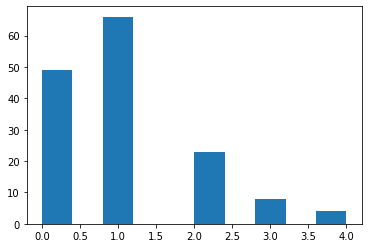

In [28]:
# Create a dataset for number of times the pH has to be adjusted per batch. The limit is no more than 5 times.

#creates an list of 150 data points which are poisson distributed an average number of 1 pH adjustment per batch

pHevents = np.random.poisson(1, 150) 

print(pHevents)

plt.hist(pHevents) 
plt.show()



## 3.8 Conclusion
The code above are suitable for simulating data for the variables with the correct distribution and within the specified specification ranges. The next step will to be combine this data into one sataset table.

# 4.0 Combining the variables into one dataset

The next step is to combine these simulated variables into one dataframe. This will be used to evaluate the descritpitve statistics and relationships between the variables.


## 4.1 Import required Python libraries

In [29]:
import pandas as pd

import matplotlib.pyplot as plt #matplot is the subprogram of python for generating plots

import numpy as np #this tells the program to generate random numbers from the numpy program

import seaborn as sns #import seaborn as sns

# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot


## 4.2 Create the code to generate the simulated data

Use the code created in section 3 above to generate the simulated data.

In [30]:
# Generate the data for the LOD data

# seed the random number generator
seed(1)

LOD = 0.11 * randn(150) + 0.004 

# tail = mean + (rand(no of extreme data points) * number to create a range)
tail = 0.11 + (rand(10) * 0.8) # ie create 10 values as a long tail from 0.105 to 0.905 (0.105+0.8). 0.8 was chosen so that tail values remained under the specification limit of NMT 1.0%.

# append the tail data to the regular data
LOD = append(LOD, tail)

In [31]:
# Generate the data for the remaining four variables

pHevents = np.random.poisson(1, 150)

assay = np.random.normal(14.4, 0.580, 150)

visc = np.random.normal(16123, 666, 150)

pH = np.random.normal(5.8, 0.16, 150)

In [32]:
# Combine the variables to create the simulated dataset.

data = ({
        'pH': [np.random.normal(5.8, 0.16, 150)],
        'assay' : [np.random.normal(14.4, 0.580, 150)],
        'visc': [np.random.normal(16123, 666, 150)], 
        'pHevents': [np.random.poisson(1, 150)],
        'LOD': [append(LOD, tail)], 
   
    })


data #displays the data set as a table/array

{'pH': [array([5.88396008, 5.72366013, 5.79424157, 5.96592624, 5.90761916,
         6.18862032, 5.96090987, 5.85657075, 5.8983562 , 5.74416253,
         5.64355632, 5.82751314, 5.87848977, 5.57675472, 5.71642297,
         5.74091906, 5.84250278, 5.75832543, 5.87121547, 5.81569796,
         5.9696524 , 5.52621317, 6.06513994, 6.02682784, 5.80805073,
         5.90405171, 5.89704774, 5.68203366, 5.82634641, 5.92450787,
         5.84957068, 5.96821132, 5.81519938, 5.81292016, 5.6771514 ,
         5.74167391, 5.72644517, 6.07287736, 5.83848089, 5.64009176,
         5.86377574, 5.76927941, 5.3113977 , 5.87677638, 5.55156819,
         5.89255431, 5.64619782, 5.56666809, 5.87909466, 5.560929  ,
         5.72852813, 5.83270038, 5.8979572 , 5.91918153, 5.79419499,
         5.66681674, 6.10781047, 5.70304299, 6.08857424, 5.727596  ,
         5.98580571, 5.97119449, 5.63271452, 5.85684552, 5.92086272,
         5.91215714, 5.76817001, 5.84831361, 5.73684965, 5.61250986,
         5.95744196, 5.71045

In [33]:
# This code could also be used to combine the variables to create the simulated dataset.

data1 = ({
        'pH': [pH],
        'assay' : [assay],
        'visc': [visc], 
        'pHevents': [pHevents],
        'LOD': [append(LOD, tail)], 
   
    })


data1 #displays the data set as a table/array

{'pH': [array([5.67347201, 5.99579555, 5.79050114, 6.0318383 , 5.72358706,
         5.80416   , 5.58420857, 6.00840569, 5.74198207, 5.56237497,
         5.70520619, 5.43121473, 5.79490925, 5.81799804, 5.84609251,
         6.03969731, 5.75184382, 5.92919295, 5.84995819, 5.76906854,
         5.46771168, 5.95160019, 5.71936417, 5.80287294, 5.59672628,
         5.84527929, 5.81728493, 5.80470682, 5.7784331 , 5.96787493,
         5.95459534, 5.9161467 , 6.3313726 , 5.70396395, 5.7392772 ,
         5.63763141, 5.86975779, 5.69000202, 5.36826212, 5.6058659 ,
         5.8115603 , 5.96156597, 5.55088935, 5.70200926, 5.77770371,
         5.683434  , 5.88498621, 5.80064013, 5.85140255, 5.68396561,
         6.04584581, 5.79994   , 6.00696794, 5.72976037, 5.89440631,
         5.69129859, 5.64785452, 5.68730395, 5.79266133, 5.76500265,
         6.04627312, 5.61620732, 5.62554587, 6.0720301 , 5.89740539,
         5.49897426, 5.87956306, 5.83797323, 5.45688895, 5.74087001,
         5.79720721, 5.91702

The data above was displayed as arrays rather than as a table. I want to see if I have created the table correctly.

In [34]:
# I'm using this code to see how many rows of data i have created

len(data)


5

In [35]:
len(data1)

5

I was expecting 150 rows of data. This suggests there is an issue with the code

In [36]:
data.head()

AttributeError: 'dict' object has no attribute 'head'

In [37]:
data.tail()

AttributeError: 'dict' object has no attribute 'tail'

In [38]:
data.describe() 


AttributeError: 'dict' object has no attribute 'describe'

In [39]:
sns.pairplot(data) 

TypeError: 'data' must be pandas DataFrame object, not: <class 'dict'>

I also could not generate the descriptive statistics or any histogram or scatter plots of the data. Therefore there is an issue with either the code used to combine the variable data or the code to create the variable data.

## 4.2 Adapting the code

### 4.2.1 This was another attempt to generate a dataset.

In [40]:
# Generate the data for the LOD data

# seed the random number generator
seed(1)

LOD = 0.11 * randn(150) + 0.004 

# tail = mean + (rand(no of extreme data points) * number to create a range)
tail = 0.11 + (rand(10) * 0.8) # ie create 10 values as a long tail from 0.105 to 0.905 (0.105+0.8). 0.8 was chosen so that tail values remained under the specification limit of NMT 1.0%.

# append the tail data to the regular data
LOD = append(LOD, tail)

In [41]:
# Generate the data for the remaining four variables

pHevents = np.random.poisson(1, 150)

assay = np.random.normal(14.4, 0.580, 150)

visc = np.random.normal(16123, 666, 150)

pH = np.random.normal(5.8, 0.16, 150)

In [42]:
data3 = pd.DataFrame(
    (LOD),
    (pHevents),
    (assay),
    (visc),
    (pH),)
    

data3

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### 4.2.2 Creating a time-date index

I wanted to see if i created a time-date index would this ensure that I had 150 different data points in my dataset. I used code form reference number XXXX

In [43]:
# This is the code used to create a time-date index:

dates = pd.date_range("1/1/2016", periods=150) # ie create 150 dates starting from 1st January 2016
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-05-20', '2016-05-21', '2016-05-22', '2016-05-23',
               '2016-05-24', '2016-05-25', '2016-05-26', '2016-05-27',
               '2016-05-28', '2016-05-29'],
              dtype='datetime64[ns]', length=150, freq='D')

In [44]:
df = pd.DataFrame(data1, index=dates)
df

,pH,assay,visc,pHevents,LOD
2016-01-01,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-02,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-03,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-04,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-05,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-06,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-07,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-08,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-09,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."
2016-01-10,"[5.673472007395973, 5.995795553913617, 5.79050...","[13.64221023775047, 14.444300678492564, 14.612...","[16004.696957474955, 15117.03605419168, 16796....","[0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...","[0.1826779900029566, -0.06329320550150828, -0...."


From this table i can see that the code I am using is creating 150 points of data for each variable for each row of data.

### 4.2.3 Using a different code to create the variables data

I decided to look at the code i was using to generate the variable data. I decided to use the alternative code from section 4.2 to generate the simulated data. I will leave the LOD data as is as the tail is important.

In [45]:
# Generate the data for the LOD data

# seed the random number generator
seed(1)

LOD = 0.11 * randn(150) + 0.004 

# tail = mean + (rand(no of extreme data points) * number to create a range)
tail = 0.11 + (rand(10) * 0.8) # ie create 10 values as a long tail from 0.105 to 0.905 (0.105+0.8). 0.8 was chosen so that tail values remained under the specification limit of NMT 1.0%.

# append the tail data to the regular data
LOD = append(LOD, tail)

In [46]:
# Generate the data for the remaining four variables

pH1 = np.random.normal(size = 150, loc = 5.8, scale = 0.16)
visc1 = np.random.normal(size = 150, loc = 16123, scale = 666)
assay1 = np.random.normal(size = 150, loc = 14.4, scale = 0.580)
pHevents1 = np.random.poisson(1, 150)

In [47]:
# This code could also be used to combine the variables to create the simulated dataset.

data4 = ({
        'pH': [pH1],
        'assay' : [assay1],
        'visc': [visc1], 
        'pHevents': [pHevents1],
        'LOD': [append(LOD, tail)], 
   
    })


data4 #displays the data set as a table/array

{'pH': [array([5.80278551, 5.620477  , 5.71726489, 5.64047571, 5.83980787,
         5.75253742, 5.87923381, 5.77204749, 5.95781363, 5.83416542,
         6.15051196, 5.49658225, 5.69649333, 5.9442379 , 6.20453211,
         5.76021844, 5.80698704, 5.76378972, 6.01303314, 5.75403074,
         5.90881117, 5.74883174, 5.5963906 , 5.85016764, 5.88050957,
         6.00691614, 5.78232848, 5.70122207, 5.89004178, 5.83851793,
         5.84490641, 5.78830197, 5.98565417, 5.85911883, 6.10474539,
         5.97776907, 5.90544797, 5.53960987, 5.89637108, 5.86724515,
         5.92975227, 5.96711074, 5.73585949, 5.9318409 , 5.71003113,
         6.11278049, 5.58688773, 5.51828983, 5.5358846 , 5.65751111,
         5.62094154, 6.11297262, 5.74776008, 5.58517187, 5.97830128,
         5.70615617, 5.60210346, 5.94013423, 5.89973795, 5.73040693,
         6.0252064 , 5.82065625, 6.05871194, 5.88043854, 6.04940889,
         5.81750443, 5.6048409 , 6.19189898, 5.71267613, 5.76818594,
         5.68793624, 5.76745

In [48]:
data4.describe() 

AttributeError: 'dict' object has no attribute 'describe'

In [49]:
# This code could also be used to combine the variables to create the simulated dataset.

data5 = ({
        'pH': [pH1],
        'assay' : [assay1],
        'visc': [visc1], 
   
    })


data5 #displays the data set as a table/array

{'pH': [array([5.80278551, 5.620477  , 5.71726489, 5.64047571, 5.83980787,
         5.75253742, 5.87923381, 5.77204749, 5.95781363, 5.83416542,
         6.15051196, 5.49658225, 5.69649333, 5.9442379 , 6.20453211,
         5.76021844, 5.80698704, 5.76378972, 6.01303314, 5.75403074,
         5.90881117, 5.74883174, 5.5963906 , 5.85016764, 5.88050957,
         6.00691614, 5.78232848, 5.70122207, 5.89004178, 5.83851793,
         5.84490641, 5.78830197, 5.98565417, 5.85911883, 6.10474539,
         5.97776907, 5.90544797, 5.53960987, 5.89637108, 5.86724515,
         5.92975227, 5.96711074, 5.73585949, 5.9318409 , 5.71003113,
         6.11278049, 5.58688773, 5.51828983, 5.5358846 , 5.65751111,
         5.62094154, 6.11297262, 5.74776008, 5.58517187, 5.97830128,
         5.70615617, 5.60210346, 5.94013423, 5.89973795, 5.73040693,
         6.0252064 , 5.82065625, 6.05871194, 5.88043854, 6.04940889,
         5.81750443, 5.6048409 , 6.19189898, 5.71267613, 5.76818594,
         5.68793624, 5.76745

Again this attempt was unsuccessful.

### 4.2.4

I researched some other code to combine the generated variables as per reference 15 above. 


In [50]:
data6 = {
             'LOD': [LOD], 
             'pH': [pH1],
             'assay' : [assay1],
             'visc': [visc1], 
             'pHevents': [pHevents1],
  
     }

purchases = pd.DataFrame(data6)
purchases
     

,LOD,pH,assay,visc,pHevents
0,"[0.1826779900029566, -0.06329320550150828, -0....","[5.802785505328001, 5.620477003400498, 5.71726...","[14.037301639149728, 14.055571020992385, 14.20...","[16537.121133867513, 15723.530182306815, 16871...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ..."


This is still displaying the dataset as a table with one row but 150 data pints for each variable in the row.

### 4.2.5
I wanted to see if I generated one random number but 150 time-date indexes if i could create a data frame as per what i started in section 4.2.4. I used the same code above but adapted it to only create one random number.


In [51]:
import pandas as pd

import matplotlib.pyplot as plt #matplot is the subprogram of python for generating plots

import numpy as np #this tells the program to generate random numbers from the numpy program

import seaborn as sns #import seaborn as sns

# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot

In [52]:
# Changed the code to only generate only one random data. I excluded the code to generate the LOD data as it was too complicated to change with the tail. 

pHeventsX = np.random.poisson(1, 1)

assayX = np.random.normal(14.4, 0.580, 1)

viscX = np.random.normal(16123, 666, 1)

pHX = np.random.normal(5.8, 0.16, 1)

In [53]:
dataX = ({
        'pH': [pHX],
        'assay' : [assayX],
        'visc': [viscX], 
        'pHevents': [pHeventsX],
   
    })

In [54]:
datesX = pd.date_range("1/1/2016", periods=150) # ie create 150 dates starting from 1st January 2016


In [55]:
dfX = pd.DataFrame(dataX, index=datesX)
dfX

,pH,assay,visc,pHevents
2016-01-01,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-02,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-03,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-04,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-05,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-06,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-07,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-08,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-09,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]
2016-01-10,[5.784635710108297],[14.589122472299671],[16855.936807601644],[1]


Unfortunately the data is returned as i wanted ie a data frame with 150 data points but the same number is generated for each variable. This is another failure.

If i had time I would investigate using the code detailed in this refernce (ref 16):
- https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

I also found the following information when i was researching again:
- https://pcse.readthedocs.io/en/stable/
- https://github.com/theodi/synthetic-data-tutorial
- https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Synthetic_data_generation/Synthetic-Data-Generation.ipynb
- https://realpython.com/python-random/
- https://scipy-lectures.org/
- https://medium.com/activewizards-machine-learning-company/top-15-python-libraries-for-data-science-in-in-2017-ab61b4f9b4a7
- https://scikit-learn.org/stable/datasets/index.html
- https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/tree/master/
- https://towardsdatascience.com/creating-a-dataset-using-an-api-with-python-dcc1607616d
- https://www.dataquest.io/blog/sci-kit-learn-tutorial/
- https://www.dataquest.io/blog/basic-statistics-in-python-probability/
- http://greenteapress.com/modsimpy/ModSimPy3.pdf
- https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
- https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
- https://www.datacamp.com/community/tutorials/probability-distributions-python
- https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/
- https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/


# Conclusion
The aim if this project was to generate a dataset of at least 4 different variables. I decided to work on a real-life example of data I am currently working on based on the QBD principle which is important in the pharmaceutical industry. 

I began by understanding the key variables of the real-life data set including the specification ranges, mean and standard deviations, and the distribution of the data. There were five key variables all were normally distributed except for one variable which was Poisson distributed. 

I was able to develop code which would generate random data based on my specific requirements (e.g. mean, standard deviation, specification range and distribution). This was proven when displayed as histograms.

I tried to combine these codes into a dataframe but was not successful. I made numerous attempts which I detail in this report after many research attempts. Unfortunately, I was not successful in time to complete this assignment.


# END